# Simulate and estimate univariate time series models (TS)

The goal is to get acquainted with univariate TS models and tests in a controlled envirnoment (=simulated data). Since we controll the environment (=true data-generating process is known) we abstract from practical faliures (e.g. outliers, breaks, model-uninformative data). Instead, we inspect properties of TS models and gain intuition.        

## Packages
We will be using NumPy, MatPlotLib and StatsModels packages. 

NumPy package provides mathematical functions and convenient data types.  
https://numpy.org/doc/stable/user/index.html#user

MatPlotLib provides functions for plotting.  
https://matplotlib.org/stable/users/index

StatsModels package provides standard timer series models and tests.  
https://www.statsmodels.org/stable/user-guide.html 

## Ex.1 Simulate AR(1) data

Simulate data from an AR(1) model by using StatsModels built-in functions. Vary the value of the autoregressive parameter ($\phi_1 \in {0,0.5,0.9,1.0}$). Plot the series and the series autocorrelation (ACF) and partial autocorrelation functions (PACF) for lags 1 to 10.  
 
1. How does the pattern of the series change when persistence increases ($phi_1$&uarr;)?  
2. What happens to the AC and PACF? 
3. Can you tell, from inspecting AC and PACF, which time series model (AR,MA,ARMA) is appropriate for the simulated series?  

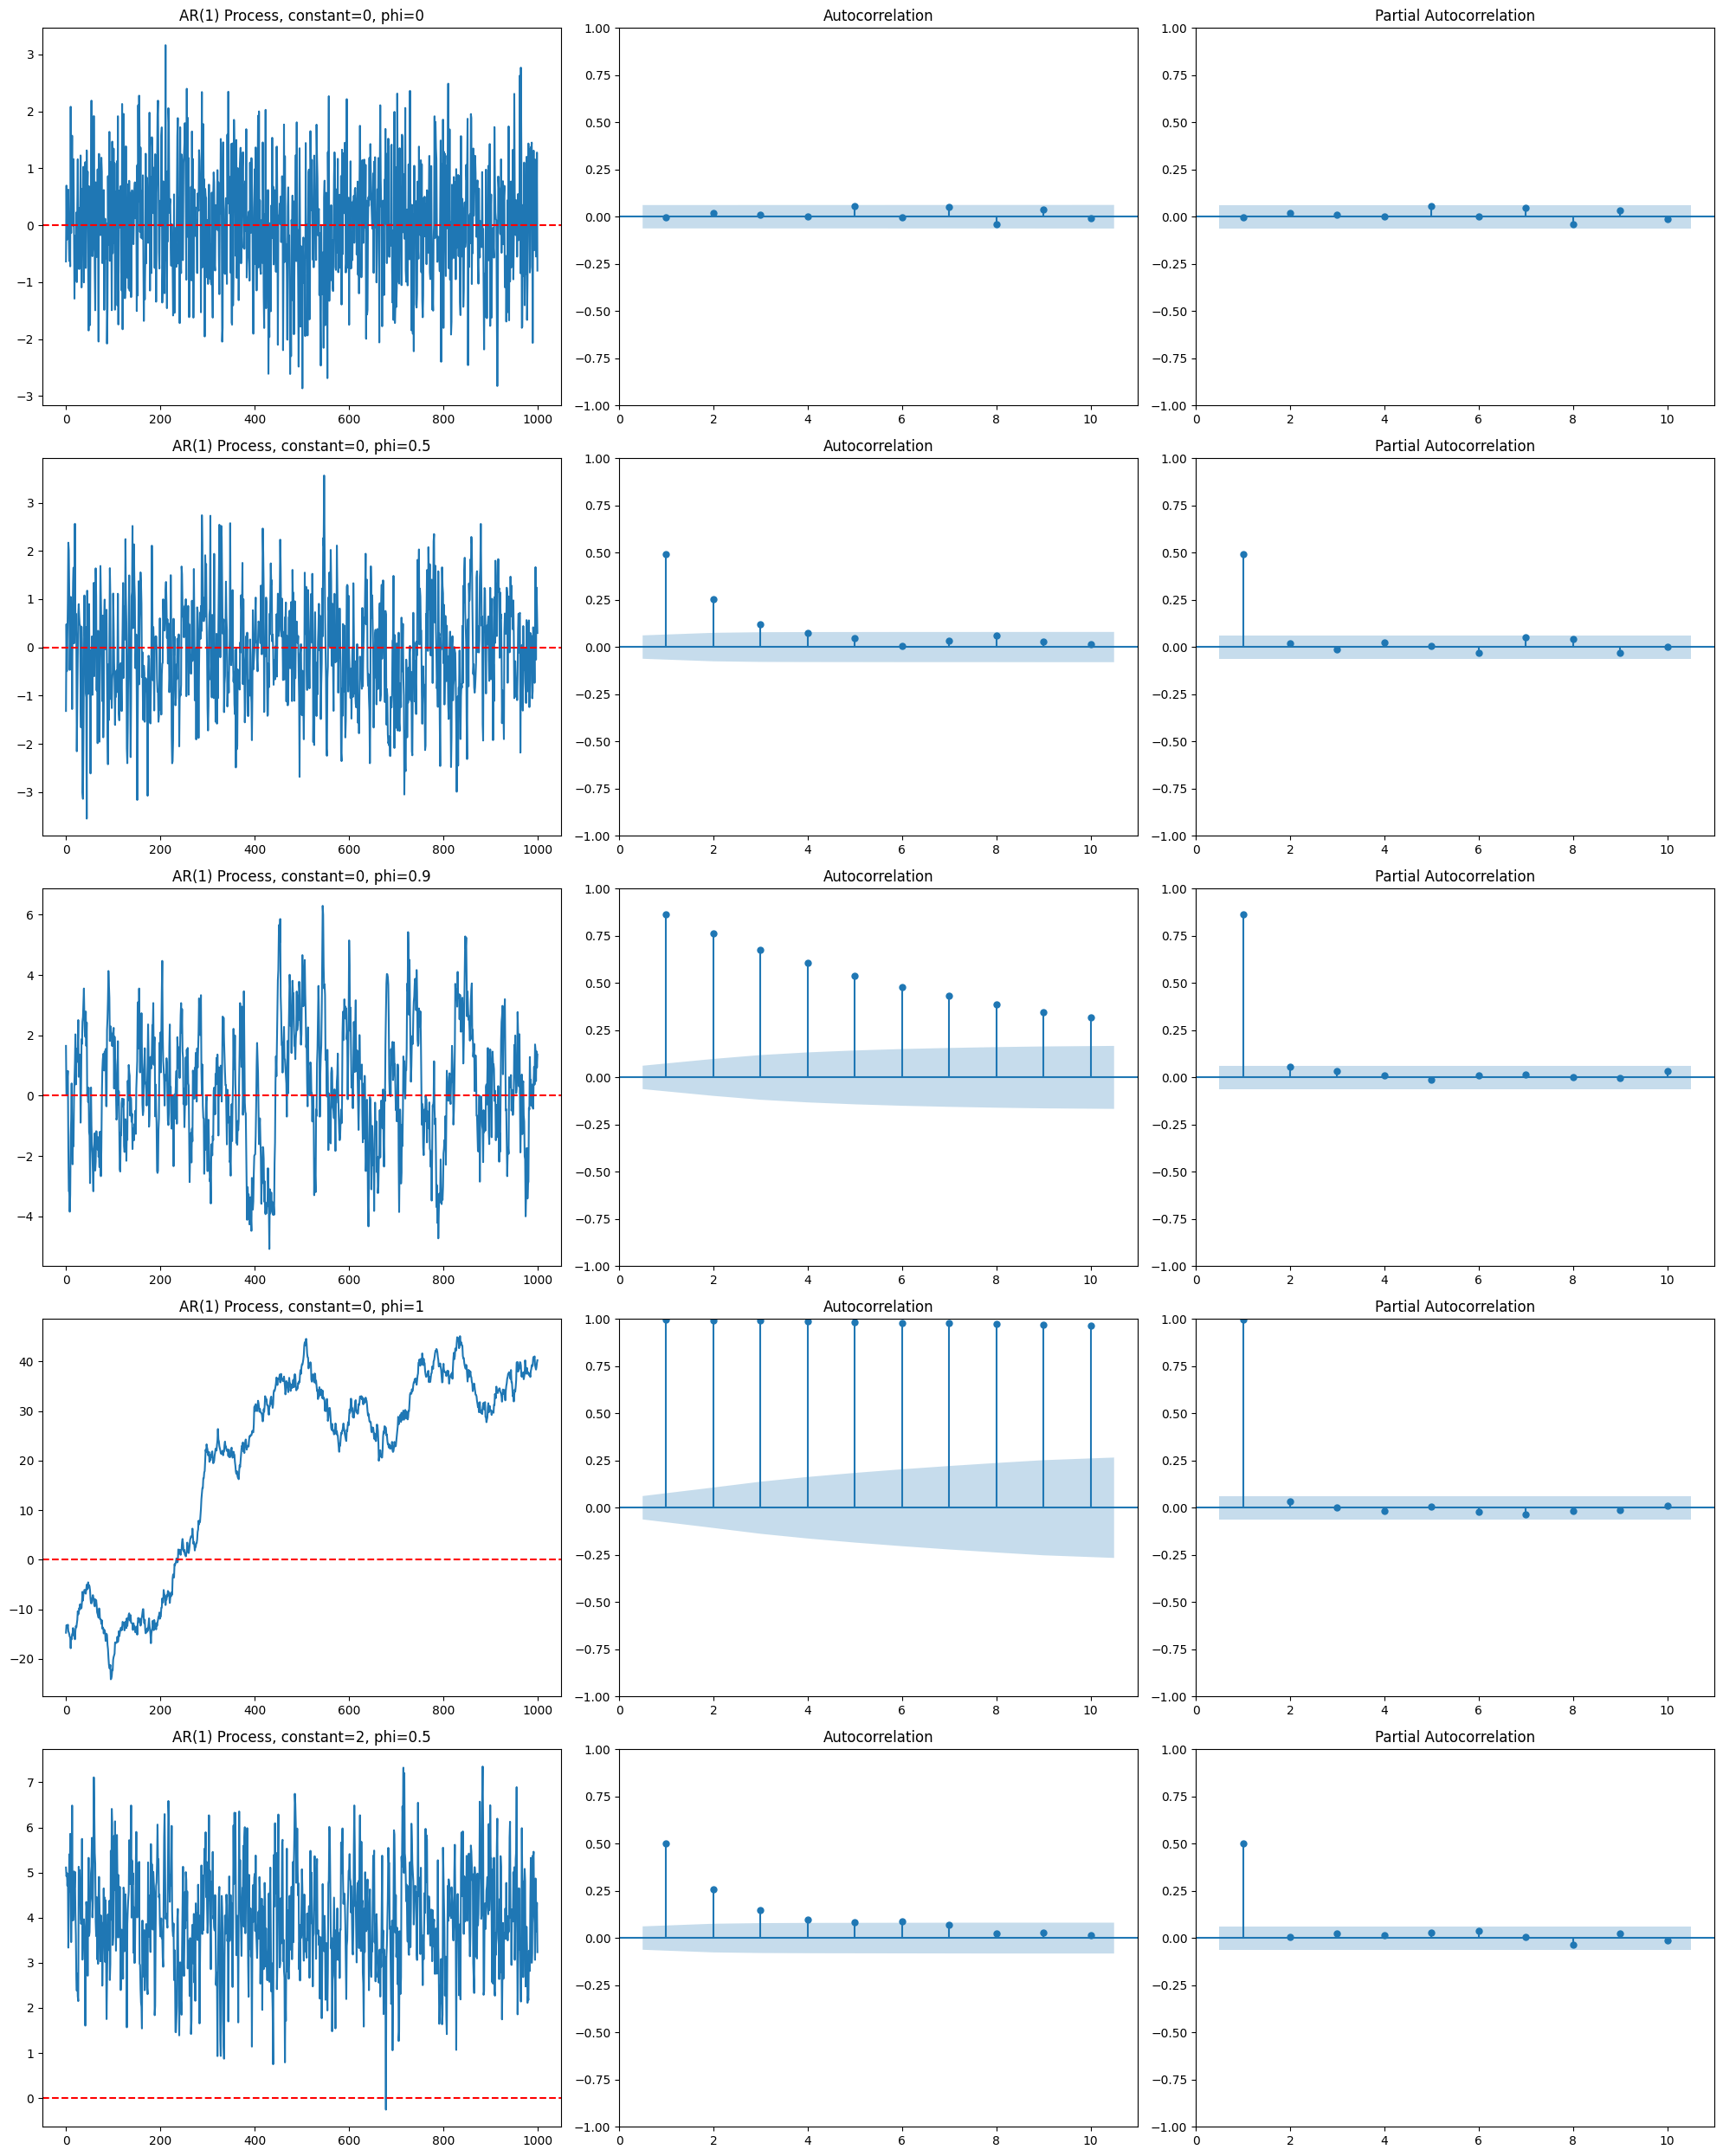

In [5]:
# initialize packages
import numpy  as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### SIMULATE AND PLOT OBSERVATIONS FROM AN AR(1) MODEL
# TO-DOs: 
# - First, finish the code. 
# - Simulate data for a model with constant term equal to 0 and vary phi. 
#   How does this affect the persistence of the plotted series? 
# - Now set phi = .5 and set constant term to 2. 
#   What will this do? At around what value will the series cycle around? 2? 

# set burn-in observations (to wash out the effect of initial values) and the number of observations to be recorded
nburn = 200
nobs  = 1000
# set coeffcient values
c   = [0, 0, 0, 0, 2]
phi = [0, 0.5, 0.9, 1, 0.5]

fig, axs = plt.subplots(5, 3, figsize=(20, 25))
for i in range(len(c)):
    # empty place-holder for the AR series
    y = np.zeros(nburn + nobs)
    # draw white-noise errors (N~(0,sig^2))
    e = np.random.standard_normal(nburn + nobs)
    
    # simulate AR(1) process
    for j in range(1, nburn + nobs):
        # YOUR CODE HERE
        y[j] = c[i] + phi[i] * y[j - 1] + e[j]
    # drop burn-in observations
    # YOUR CODE HERE
    y = y[nburn:]
    # plot series, AC, and PAC for each simulation
    axs[i, 0].plot(y)
    axs[i, 0].axhline(c, linestyle='--', color='red')
    axs[i, 0].set_title(f"AR(1) Process, constant={c[i]}, phi={phi[i]}")
    sm.graphics.tsa.plot_acf(y, lags=10, ax=axs[i, 1], zero=False)
    sm.graphics.tsa.plot_pacf(y, lags=10, ax=axs[i, 2], zero=False)

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

In [6]:
## COMPARE THEORETICAL WITH SIMULATED-DATA MOMENTS
# Calculate theoretical mean and variance of y
# and compare them to mean and variance of simulated data:
# TODOs: 
# - Derive the mean and variance of y that distributes as an AR(1) process with a constant. Fill in the below formulas. 
# - Compare the estimated and the theoretical means and variances of AR(1). 
# - What does the below tell you about estimating the true values of model parameters from sample data?  
# - What happens to the results displayed below if you increase the data? 
# YOUR CODE HERE
sig2_e = 1
mu = c[-1] / (1 - phi[-1])
sig2_y = sig2_e / (1 - phi[-1]**2)
print(f"Theoretical mean is {mu}")
print(f"Sample mean is {np.mean(y)}")
print(f"Theoretical variance is sig^2/(1-phi_1^2) = {sig2_y}")
print(f"Sample variance is {np.var(y)}")

Theoretical mean is 4.0
Sample mean is 3.952018068429258
Theoretical variance is sig^2/(1-phi_1^2) = 1.3333333333333333
Sample variance is 1.296832668948263


## Ex.2 Simulate MA(1) data

Repeat Ex.1 for an MA(1) model with $\theta_1 \in {0,0.5,0.9,1.0}$. Use StatsModels built-in function for simulating data from ARMA models. 

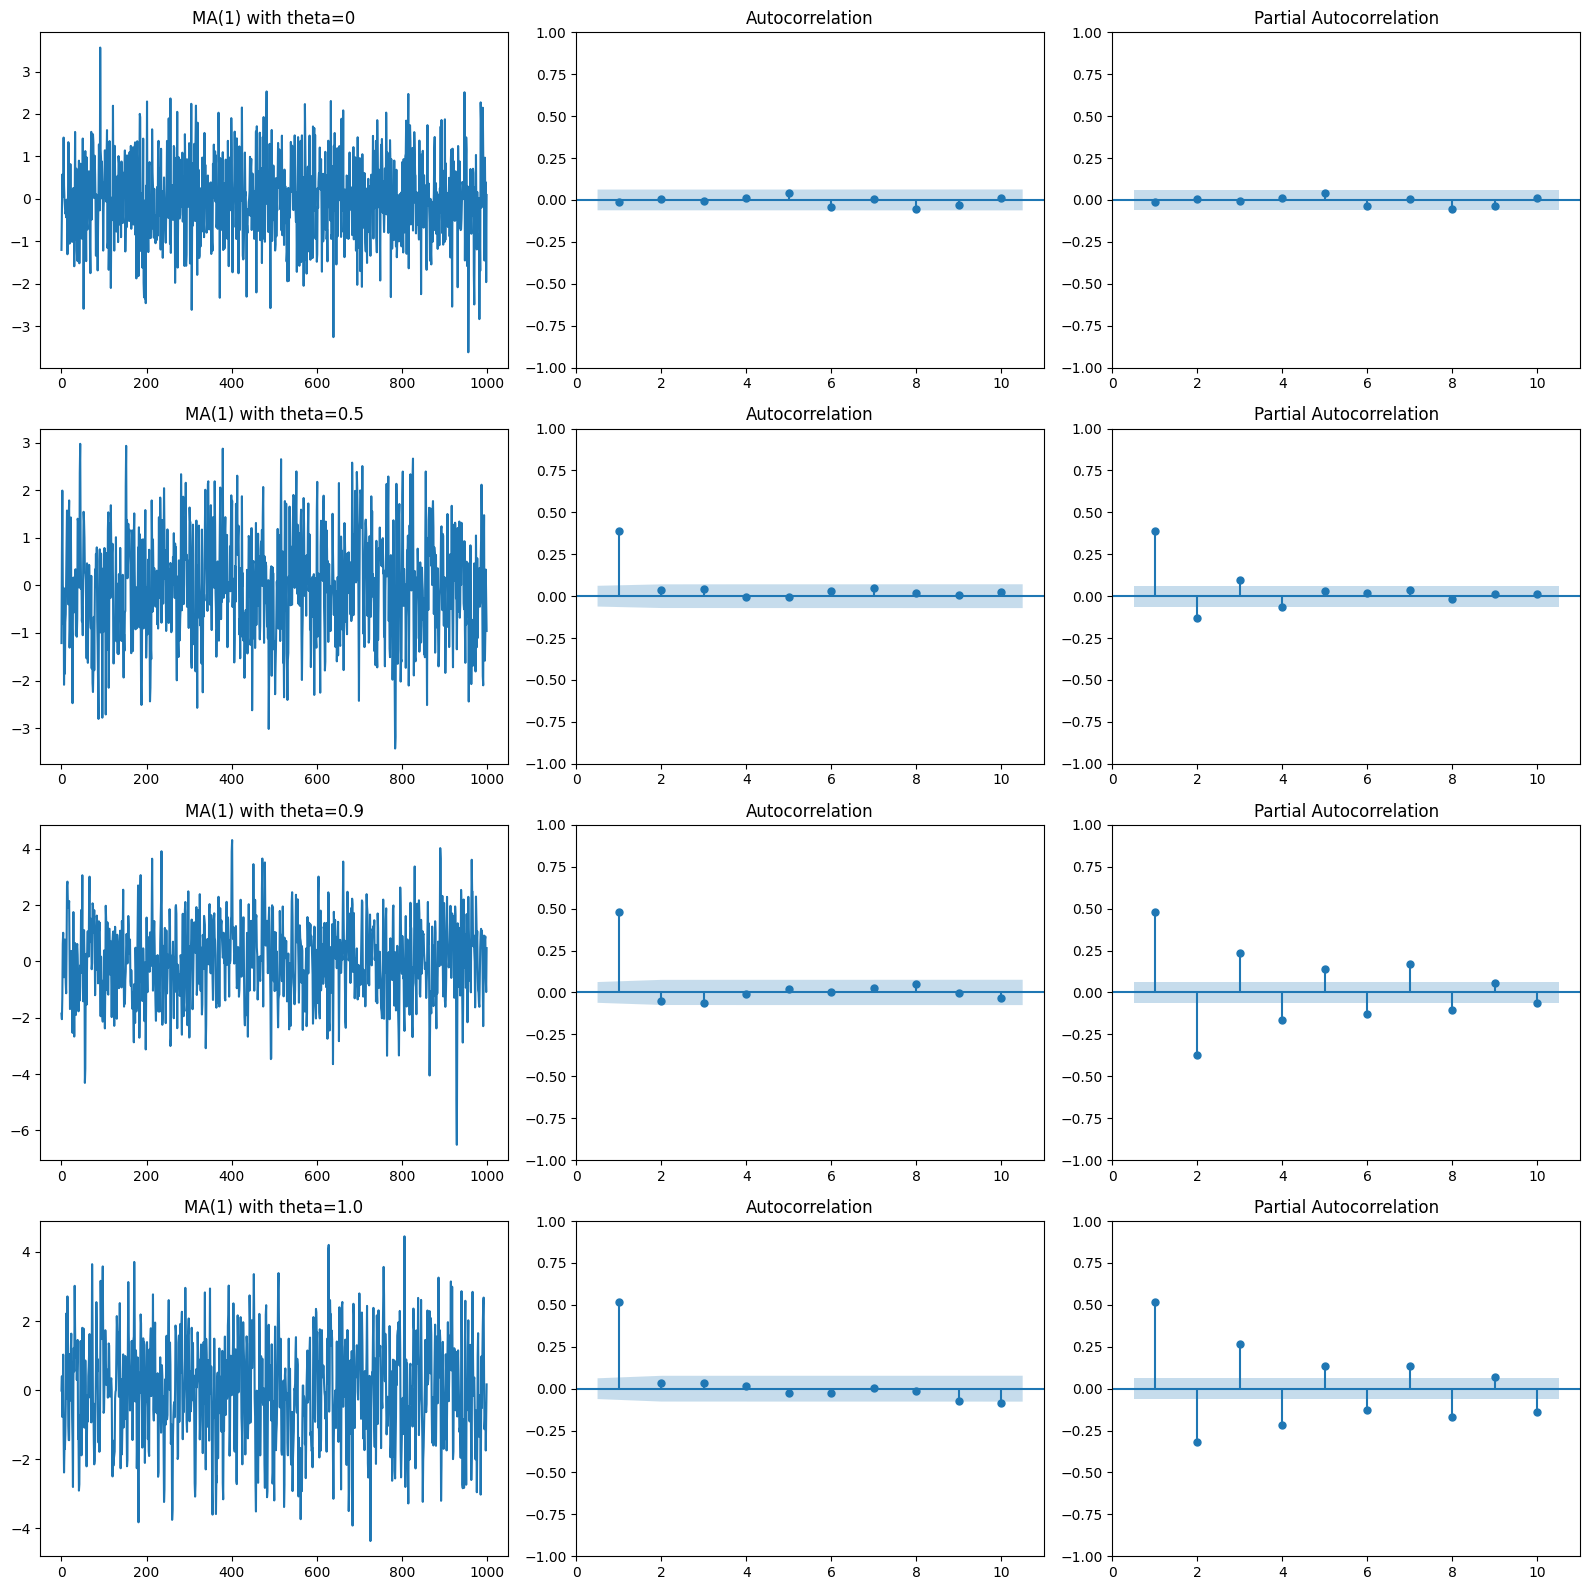

In [18]:
# set the number of observations
nobs  = 1000
# set AR and MA lag polynomials 
# format: phi(L) y_t = theta(L) epsilon_t ...
# WRITE ON THE BOARD
#  (1 + phi1 L + phi2 L^2 +...) y_t = epsilon_t (1 + psi1 L + psi2 L^2 + ...) 
# np.r_ helps quickly concatenating scalars

# simulate y_t
# YOUR CODE HERE
theta_vals = [0, 0.5, 0.9, 1.0]
fig, axs = plt.subplots(len(theta_vals), 3, figsize=(16, 16))
for i, theta in enumerate(theta_vals):
    # AR lag polynomial
    ar = np.r_[1]  # AR(0) model, hence only [1]. For AR(1) use ar = np.r_[1, -phi]
    # MA lag polynomial
    ma = np.r_[1, theta]  # MA(1) model
    # Simulate y_t from an MA(1) model
    y = sm.tsa.arma_generate_sample(ar, ma, nobs)
    # Plot the time series, ACF, and PACF
    axs[i, 0].plot(y)
    axs[i, 0].set_title(f"MA(1) with theta={theta}")
    sm.graphics.tsa.plot_acf(y, lags=10, ax=axs[i, 1], zero=False)
    sm.graphics.tsa.plot_pacf(y, lags=10, ax=axs[i, 2], zero=False)
plt.tight_layout()
plt.show()


## Ex.3 Simulate ARMA(1,1) data and perform statistical test

1. Simulate 200 data points from a (stationary!) ARMA(2,0) model. Assume $\phi_1 = 0.6, \phi_2 = .3$. Plot the data.
2. Test the data for stationarity by using augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin test. 
3. Inspect AC and PAC function to select number of AR and MA lags. 
4. Estimate the true model (ARMA(2,0))
5. Test for whitness of the residuals by using the BP autocorrelation test.   
6. Estimate ARMA(1,0), ARMA(3,0) and discuss the differences
7. Display information criteria for AR(1)-AR(3)

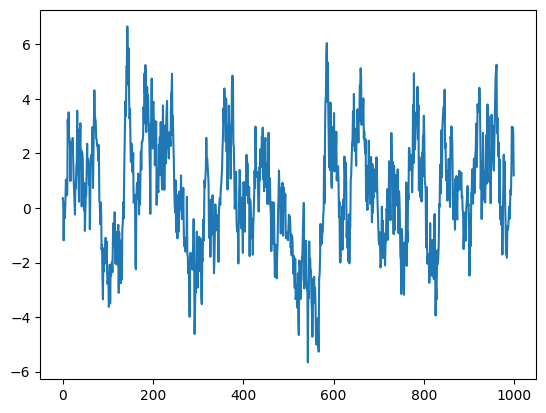

In [19]:
# PART 1
# set the number of observations
nobs = 1000
# set AR and MA lag polynomials 
# YOUR CODE HERE
phiL = np.r_[1, -0.6, -0.3]
thetaL = np.r_[1]
# simulate y_t
y = sm.tsa.arma_generate_sample(phiL, thetaL, nobs) 
# plot
plt.plot(y)

In [21]:
# PART 2: ADF test
# What is null hypothesis in ADF-test? 
print("Results of Dickey-Fuller Test:")
res = sm.tsa.stattools.adfuller(y,maxlag=5,regression='c',autolag='AIC')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
print(f"#Lags Used:{res[2]}")
print(f"#Observations Used:{res[3]}")
print(f"#Critical value:{res[4]}")
print("-----------------------------------------------------------------------------------------------------------")
print("DECISION RULE: If p-value is < than desired significance level (1%,5% or 10%) we reject the null hypothesis.")
print("What is the null hypothesis in ADF test?")
print("How do we proceede if the null hypothesis is rejected?")
print("How do we proceede if the null hypothesis is not rejected? Hint: 1) Use differences. 2) For FCS purposes you can in principle continue to use levels. What are the consqeuences in this case?")

Results of Dickey-Fuller Test:
Test Statistic:-5.9814702533603334
p-value:1.8341911366905345e-07
#Lags Used:1
#Observations Used:998
#Critical value:{'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}
-----------------------------------------------------------------------------------------------------------
DECISION RULE: If p-value is < than desired significance level (1%,5% or 10%) we reject the null hypothesis.
What is the null hypothesis in ADF test?
How do we proceede if the null hypothesis is rejected?
How do we proceede if the null hypothesis is not rejected? Hint: 1) Use differences. 2) For FCS purposes you can in principle continue to use levels. What are the consqeuences in this case?


In [22]:
# PART 2: KPSS test
# What is null hypothesis in KPSS-test? 
print("Results of KPSS Test:")
res = sm.tsa.stattools.kpss(y,regression='c',nlags='auto')
print(f"Test Statistic:{res[0]}")
print(f"p-value:{res[1]}")
# print(f"#truncation lags:{res[2]}")
# print(f"#Critical value:{res[3]}")
print("-----------------------------------------------------------------------------------------------------------")
print("DECISION RULE: If p-value is < than desired significance level (1%,5% or 10%) we reject the null hypothesis.")
print("What is the null hypothesis in KPSS test?")
print("What does this test imply?")


Results of KPSS Test:
Test Statistic:0.13276093633255764
p-value:0.1
-----------------------------------------------------------------------------------------------------------
DECISION RULE: If p-value is < than desired significance level (1%,5% or 10%) we reject the null hypothesis.
What is the null hypothesis in KPSS test?
What does this test imply?


C:\Users\zaitsevav\AppData\Local\Temp\ipykernel_43556\2540553266.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = sm.tsa.stattools.kpss(y,regression='c',nlags='auto')


If the results in Ex. (1-3) are unclear, increase the number of observations.
Which model do AC&PAC imply?


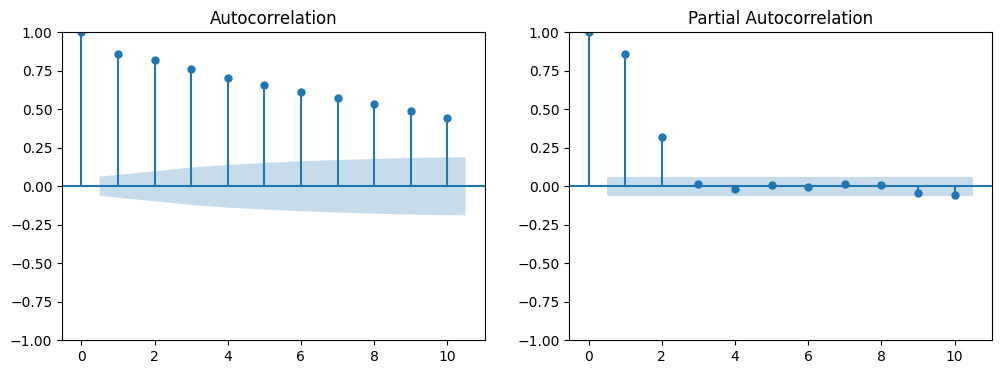

In [24]:
# PART 3 Inspect AC and PAC function and select the number of AR and MA lags. 
fig, axs = plt.subplots(1, 2,figsize=(12,4))
sm.graphics.tsa.plot_acf(y, lags=10, ax=axs[0])
sm.graphics.tsa.plot_pacf(y, lags=10, ax=axs[1])
print("If the results in Ex. (1-3) are unclear, increase the number of observations.")
print("Which model do AC&PAC imply?") # AR


In [25]:
# PART 4 Estimate the true model
# YOUR CODE HERE
p = 1  # AR term
d = 0  # No differencing needed if data is stationary
q = 1  # MA term
mod = sm.tsa.arima.ARIMA(y, order=(1, 0, 0), trend='c', validate_specification=True)
res = mod.fit()
print(res.summary())
print("---------------------------------------------------------------------------")
print("Interpret statistical significance of the coefficients. E.g. P-values for ar.L1?")
print("Explain LB-test for residual autocorrelation. [See next task..]")
print("What is the null hypothesis in the heteroscedasticity test? What are the consequences in the presence of heteroscedasticity? [SSR in 1st 1/3 of the sample is the same as in the last 1/3 sample.]")
print("What is the null hypothesis in Jarque-Bera test?")



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1418.980
Date:                Mon, 30 Sep 2024   AIC                           2845.959
Time:                        21:19:34   BIC                           2865.590
Sample:                             0   HQIC                          2853.420
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5348      0.354      1.509      0.131      -0.160       1.229
ar.L1          0.9402      0.012     75.804      0.000       0.916       0.965
ma.L1         -0.3320      0.035     -9.382      0.0

1. Interpretation of Coefficients:
- Constant (const): The coefficient is 0.5348, but the p-value is 0.131 (greater than 0.05), so it is not statistically significant at the 5% level. This implies that the constant term does not significantly contribute to the model.
- AR(1) coefficient (ar.L1): The coefficient is 0.9402 with a very small p-value (0.000), indicating that the AR(1) term is highly statistically significant. The large coefficient suggests a strong autoregressive relationship in the data.
- MA(1) coefficient (ma.L1): The coefficient is -0.3320, and the p-value (0.000) is also very small, indicating that the MA(1) term is highly statistically significant. This shows that the moving average component significantly contributes to explaining the series.
- Variance of residuals (sigma2): The variance is estimated at 0.9986, and its p-value is 0.000, meaning it is statistically significant.
2. Ljung-Box Test for Residual Autocorrelation:
- Ljung-Box (L1) (Q): The test statistic is 0.90 with a p-value of 0.34. Since the p-value is greater than 0.05, we fail to reject the null hypothesis of no autocorrelation in the residuals. This suggests that the model has sufficiently captured the time dependencies in the data, and there is no significant autocorrelation in the residuals.
3. Jarque-Bera Test for Normality:
- Jarque-Bera (JB): The test statistic is 2.13 with a p-value of 0.35. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the residuals are normally distributed. This indicates that the residuals do not show significant deviations from normality.
4. Heteroskedasticity Test:
- Heteroskedasticity (H): The H-statistic is 1.05 with a p-value of 0.63. Since the p-value is greater than 0.05, we fail to reject the null hypothesis that the residuals have constant variance (i.e., no heteroscedasticity). This suggests that the residuals have constant variance over time (homoscedasticity).
5. Null Hypotheses and Consequences:
- Null Hypothesis in the Heteroscedasticity Test: The null hypothesis is that the residuals are homoscedastic (i.e., they have constant variance). If we reject the null hypothesis and heteroscedasticity is present, the model's standard errors may be unreliable, leading to inaccurate confidence intervals and hypothesis tests. In this case, no heteroscedasticity was detected, so the model is reliable in this aspect.
- Null Hypothesis in the Jarque-Bera Test: The null hypothesis is that the residuals are normally distributed. In your case, the test suggests that the residuals are normally distributed, which is a positive result because normally distributed residuals help ensure that the model’s estimates are unbiased and efficient.

The residuals should exhibit no patterns. Especially autocorrelation and/or heteroscedasticity.
Ljung-Box and Box-Pierce for residual autocorrelation
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.894789   0.344183   0.892110   0.344906
2    9.639938   0.008067   9.602348   0.008220
3    9.658289   0.021706   9.620607   0.022082
4    9.768147   0.044520   9.729808   0.045233
5    9.769329   0.082041   9.730982   0.083227
6   10.136283   0.119029  10.095006   0.120708
7   10.194799   0.177801  10.152996   0.180068
8   12.093826   0.147066  12.033071   0.149734
9   12.547119   0.184192  12.481387   0.187511
10  12.951031   0.226423  12.880462   0.230432
Despite wide use, LB test has no asymptotic justification in time series models.


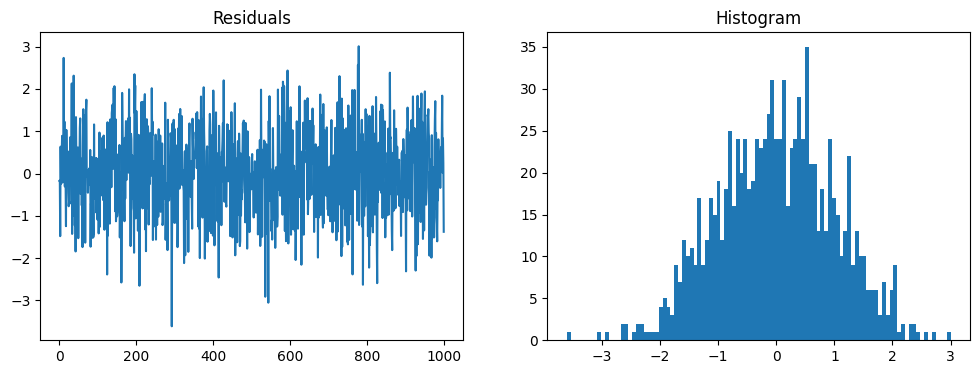

In [27]:
# PART 5 Test for whiteness of the residuals
# First plot the residuals
y_hat = res.fittedvalues
e = y - y_hat
fig, axs = plt.subplots(1, 2,figsize=(12,4))
axs[0].plot(e)
axs[0].set_title("Residuals")
axs[1].hist(e,bins=100)
axs[1].set_title("Histogram")
# or use >plt.plot(res.resid)
print("The residuals should exhibit no patterns. Especially autocorrelation and/or heteroscedasticity.")
# Perform LB and BP tests for whitness of the residuals
print("Ljung-Box and Box-Pierce for residual autocorrelation")
res_lb = sm.stats.diagnostic.acorr_ljungbox(e, lags=10, boxpierce=True)
print(res_lb)
# rule-of-thumb for number of lags min(10, T/5), https://robjhyndman.com/hyndsight/ljung-box-test/ 
print("Despite wide use, LB test has no asymptotic justification in time series models.")


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1467.747
Date:                Mon, 30 Sep 2024   AIC                           2941.494
Time:                        21:34:59   BIC                           2956.218
Sample:                             0   HQIC                          2947.090
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5269      0.236      2.231      0.026       0.064       0.990
ar.L1          0.8592      0.016     54.412      0.000       0.828       0.890
sigma2         1.1011      0.052     21.295      0.0

Text(0.5, 1.0, 'Histogram')

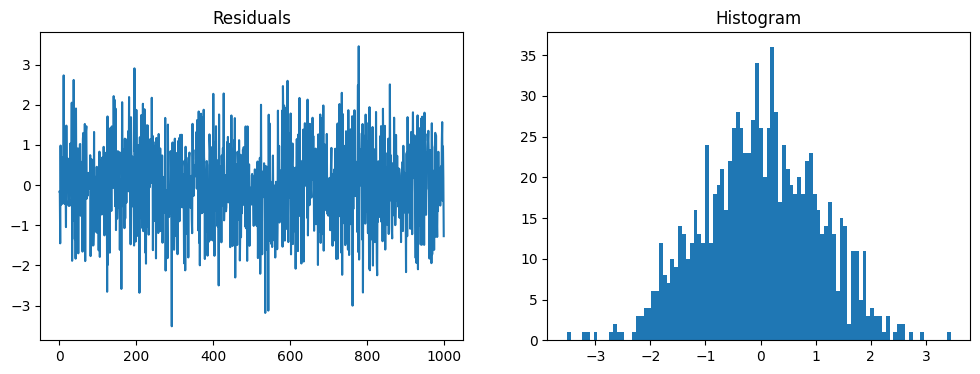

In [29]:
# PART 6 Estimate ARMA(1,0)
# ARMA(1,0) - missing an important regressor 
mod = sm.tsa.arima.ARIMA(y, order=(1, 0, 0), trend='c', validate_specification=True)
res = mod.fit()
print(res.summary())
print("---------------------------------------------------------------------------")
print("We estimated an under-fitted model.")
print("Are the residuals uncorrelated? Check the LB test for the first lag in the regression table.")
print("Are the residuals normal? Check the JB test.")
print("Run the LB test for higher lags:")
res_lb = sm.stats.diagnostic.acorr_ljungbox(res.resid, lags=10, boxpierce=True,model_df=2+0)
print(res_lb)
print("Plot the residuals")
fig, axs = plt.subplots(1, 2,figsize=(12,4))
axs[0].plot(res.resid)
axs[0].set_title("Residuals")
axs[1].hist(res.resid,bins=100)
axs[1].set_title("Histogram")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1414.004
Date:                Mon, 30 Sep 2024   AIC                           2838.008
Time:                        21:37:29   BIC                           2862.546
Sample:                             0   HQIC                          2847.334
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5354      0.334      1.604      0.109      -0.119       1.189
ar.L1          0.5789      0.032     18.066      0.000       0.516       0.642
ar.L2          0.3081      0.036      8.629      0.0

Text(0.5, 1.0, 'Histogram')

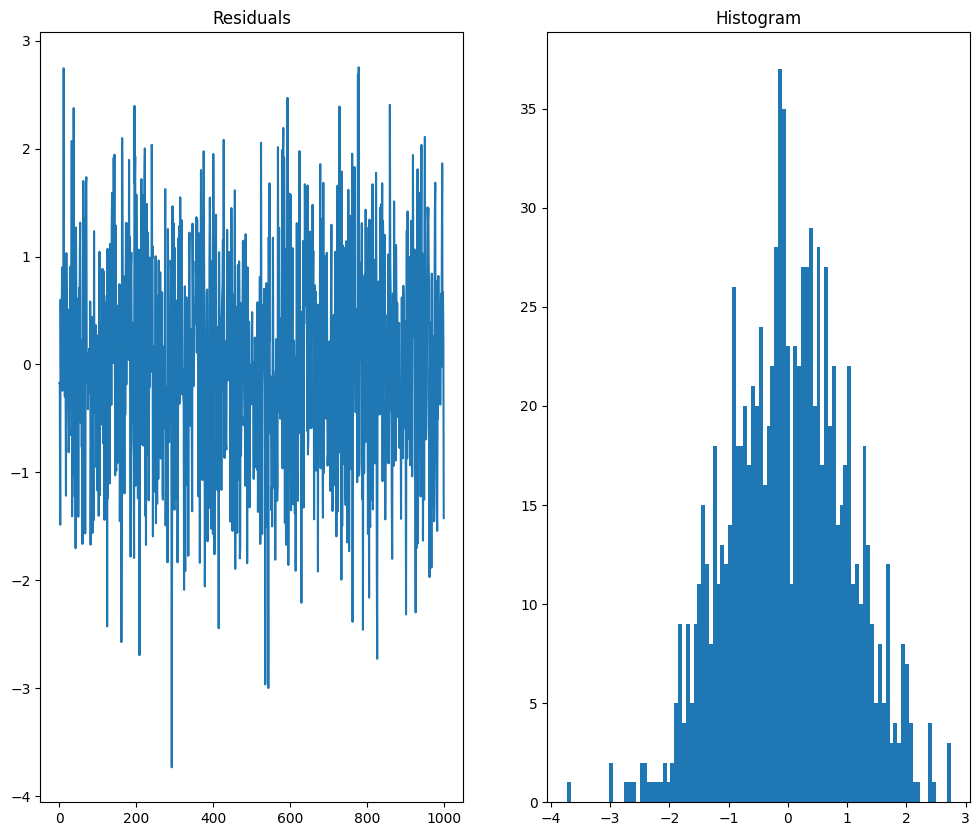

In [30]:
# PART 6 Estimate ARMA(3,0)
# ARMA(3,0) - too many regressors 
mod = sm.tsa.arima.ARIMA(y, order=(3, 0, 0), trend='c', validate_specification=True)
res = mod.fit()
print(res.summary())
print("---------------------------------------------------------------------------")
print("We estimated an under-fitted model.")
print("Are the residuals uncorrelated? Check the LB test for the first lag in the regression table.")
print("Are the residuals normal? Check the JB test.")
print("Run the LB test for higher lags:")
res_lb = sm.stats.diagnostic.acorr_ljungbox(res.resid, lags=10, boxpierce=True,model_df=2+0)
print(res_lb)
print("Plot residuals")
fig, axs = plt.subplots(1, 2,figsize=(12,10))
axs[0].plot(res.resid)
axs[0].set_title("Residuals")
axs[1].hist(res.resid,bins=100)
axs[1].set_title("Histogram")

In [31]:
# PART 8 Information criteria
# arima_order_select_ic uses ML which issues a lot of redundant warnings so we suppress those
import warnings
warnings.filterwarnings("ignore") 

# Estimate AR(1)-AR(3) and display information criteria
# estimate ICs
IC = sm.tsa.stattools.arma_order_select_ic(y, max_ar=5, max_ma=5, ic=['aic','bic','hqic'], trend='c') # trend='c" means include constant
# display optimal lags
print(f"min AIC at (p,q): {IC.aic_min_order}")
print(f"min BIC at (p,q): {IC.bic_min_order}")
print(f"min HQIC at (p,q): {IC.hqic_min_order}")
    

min AIC at (p,q): (2, 0)
min BIC at (p,q): (2, 0)
min HQIC at (p,q): (2, 0)
